## Analyze A/B Test Results

**Completed by Wen-Yun Chang<br>
March 2nd, 2019**

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

An e-commerce website has collected results of an A/B test for their new page.  The purpose of this analysis is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

First, import the libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df[df.converted == 1].user_id.nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#count(df[(df.landing_page == "new_page") && (df.group != "treatment"])
         
print(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]['user_id'].nunique())
print(df[((df['landing_page'] == 'new_page') == (df['group'] == 'treatment')) == False]['user_id'].nunique())

3893
3893


f. Do any of the rows have missing values?

In [7]:
len(df[df.isnull().any(axis=1)])

0

In [8]:
## Testing null rows
df1 = pd.DataFrame([[1,np.NaN,12, np.NaN],[2,21,22,23],[3,31,np.NaN,33]])
df1
# count number of rows with null
len(df1[df1.isnull().any(axis=1)])

2

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, delete these rows.  

a. Create a new dataset.  Store the new dataframe in **df2**.

In [9]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(subset=['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated(subset=['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop_duplicates(subset=['user_id'])

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [16]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2[df2.group == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2[df2.group == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
df2.groupby('landing_page')['user_id'].count()/len(df2)

landing_page
new_page    0.500062
old_page    0.499938
Name: user_id, dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The probability of an individual converting on receiving the treatment (0.1188) is lower than the probability of one converting on receiving the control page (0.1204). There is insufficient evidence to say that the new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$**: **$p_{new}$** <= **$p_{old}$** or **$p_{new}$** - **$p_{old}$** <= 0<br> 
**$H_{1}$**: **$p_{new}$** > **$p_{old}$** or **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
pnew_cvt = df2.converted.mean()
pnew_cvt

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
pold_cvt = df2.converted.mean()
pold_cvt

0.11959708724499628

c. What is $n_{new}$?

In [22]:
len(df2[df2.landing_page == 'new_page'])

145310

d. What is $n_{old}$?

In [23]:
len(df[df.landing_page == 'old_page'])

147239

In [24]:
df2.groupby('landing_page')['converted'].count()

landing_page
new_page    145310
old_page    145274
Name: converted, dtype: int64

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# simulate by np.random.choice or np.random.binomial
#new_page_converted = np.random.choice([0,1], 145310, replace=True, p=[1-pnew_cvt,pnew_cvt])
new_page_converted = np.random.binomial(1, pnew_cvt, 145310)
new_page_converted[:5], new_page_converted.mean()

(array([0, 0, 0, 1, 0]), 0.11902828435758035)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
#old_page_converted = np.random.choice([0,1], 147239, replace=True,p=[1-pold_cvt, pold_cvt])
old_page_converted = np.random.binomial(1, pold_cvt, 147239)
old_page_converted[:5], old_page_converted.mean()

(array([0, 0, 0, 0, 0]), 0.1208850915857891)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
diff = new_page_converted.mean() -  old_page_converted.mean()
diff

-0.0018568072282087456

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
p_diffs = [] # initialize

for _ in range(10000):
    new_page_converted = np.random.binomial(1, pnew_cvt, 145310)
    old_page_converted = np.random.binomial(1, pold_cvt, 147239)
    p_diffs.append(new_page_converted.mean() -  old_page_converted.mean())


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

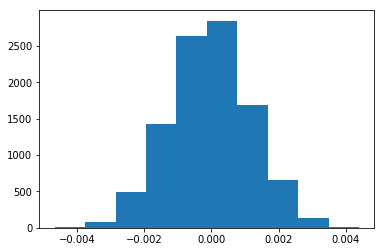

In [29]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.9032

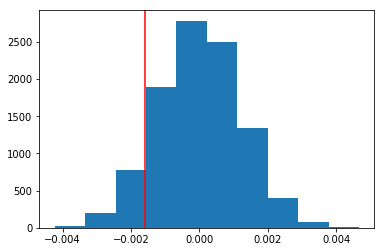

In [30]:
# convert to numpy array
p_diffs = np.array(p_diffs)

# calculate the observed difference
obs_diff = df2[df2.group == 'treatment']['converted'].mean() \
    - df2[df2.group == 'control']['converted'].mean()

# simulate distribution under the null hypothesis
null_vals = np.random.normal(0,p_diffs.std(), p_diffs.size)

# plot nulll distribution
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red')

# calculate p value
(null_vals > obs_diff).mean()

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**As computed in part j, the p value is higher than 0.05. It is likely that our statistics is from this null. The null hypothesis is accepted and the recommendation is to keep the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control']['converted'].sum()
convert_new = df2[df2.group == 'treatment']['converted'].sum()
n_old = df2[df2.group == 'control']['user_id'].nunique()
n_new = df2[df2.group == 'treatment']['user_id'].nunique()
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],\
                                    [n_old, n_new],alternative='larger')
z_score, p_value

(1.3109241984234394, 0.09494168724097551)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**z-score of 1.31 maps to 90.49 percentile. p value of 0.09 is greater than 0.05, so we do not reject the null hypothesis. This matches the previous findings in j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**This is logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept'] = 1

df2[['control','ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('control',axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
# fit the logistic regression with intercept and ab_page
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 02 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        00:52:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p value for ab_page is 0.190, which is more than 0.05. It indicates that ab_page is statistically insignificant as a variable. It is very close to the p value obtained in Part II.<br>
<br>
This implies that the control group with the old page and the experiment group with the new page do not influence the conversion rate.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other factors could influence the outcome. For example, the timestamp might reflect users who login in the day or at night, or from a different time zone. The date could show between weekend and weekdays users.<br>
<br>
If we add more terms however, we should look out for multi-collinearity. For example, do not test with ab_page and landing_page columns.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion? 

In [36]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [37]:
# find all the unique countries in the data
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [38]:
### Create the necessary dummy variables
ctry_dummies = pd.get_dummies(df_new['country'])
df_new2 = df_new.join(ctry_dummies)

# drop CA column, using CA as the baseline
df_new2 = df_new2.drop('CA',axis=1)
df_new2.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


h. Explore the interaction between page and country to see if there significant effects on conversion. 

In [39]:
### Fit Your Linear Model And Obtain the Results
logit_mod2 = sm.Logit(df_new2['converted'],df_new2[['intercept','ab_page',\
                                                    'US','UK']])
results2 = logit_mod2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 02 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        00:52:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

**The logistic regression, the ab_page, US and UK p values are greater than 0.05. So neither the landing page nor the country affects the conversion rate.** <br>
<br>
**By the three different methods -- probability, A/B testing with sampling distribution, and logistic regression -- the new landing page does not seem to increase conversion rate over the old landing page. Probability shows that both old and new page has almost similar conversion probability. A/B testing does not provide enough evidence to reject the null hypothesis of old page has equal or higher conversion rate than new page. The logistic regression shows that the landing page does not influence conversion rate.<br>
<br>
It is recommended that the e-commerce website keep the old landing page.**


### References
Proportions_ztest<br>
http://knowledgetack.com/python/statsmodels/proportions_ztest/

Statsmodel Statistic in Python
https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html